# Travel Review Segmentation

### Abstract:
Understanding the tastes of each user and the characteristics of each product is necessary to predict how a user will respond to a new product.
This latent user and product dimensions can be discovered with the help of user feedback. A numeric rating and its accompanying text review is the most widely available form of user feedback. A measure which encapsulates the contents of such reviews is often necessary as they have been found to significantly influence the shopping behaviour of users. A fine-grained form of such measure that could act as perfect feedback about the product is a star rating. The review rating prediction tries to predict a rating corresponding to the given review.


### Problem Statement:
Given the google rating data, use a hierarchical clustering algorithm to cluster reviews.
### Dataset Information:
This data set is populated by capturing user ratings from Google reviews. Reviews on attractions from 24 categories across Europe are considered.
Google user rating ranges from 1 to 5 and the average user rating per category is calculated.

### Input variables:

1) **User** Unique user id 


2) **Attribute 1:** Average ratings on churches 


3) **Attribute 2:** Average ratings on resorts  


4) **Attribute 3:** Average ratings on beaches  


5) **Attribute 4:** Average ratings on parks  


6) **Attribute 5:** Average ratings on theatres  


7) **Attribute 6:** Average ratings on museums  


8) **Attribute 7:** Average ratings on malls  


9) **Attribute 8:** Average ratings on zoo  


10) **Attribute 9:** Average ratings on restaurants  


11) **Attribute 10:** Average ratings on pubs/bars  


12) **Attribute 11:** Average ratings on local services  


13) **Attribute 12:** Average ratings on burger/pizza shops  


14) **Attribute 13:** Average ratings on hotels/other lodgings  


15) **Attribute 14:** Average ratings on juice bars  


16) **Attribute 15:** Average ratings on art galleries 


17) **Attribute 16:** Average ratings on dance clubs  


18) **Attribute 17:** Average ratings on swimming pools  


19) **Attribute 18:** Average ratings on gyms  


20) **Attribute 19:** Average ratings on bakeries  


21) **Attribute 20:** Average ratings on beauty & spas  


22) **Attribute 21:** Average ratings on cafes  


23) **Attribute 22:** Average ratings on view points  


24) **Attribute 23:** Average ratings on monuments  


25) **Attribute 24:** Average ratings on gardens 





### Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [11]:
df=pd.read_csv("google_review_ratings.csv")
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


### Data Analysis and Preparation
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:

1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

### Understanding the dataset

In [12]:
df1=df.copy()
df1.shape

(5456, 26)

In [13]:
df1.columns

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24', 'Unnamed: 25'],
      dtype='object')

In [14]:
df1.columns = ['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls',
              'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 
              'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs',
              'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points',
              'monuments', 'gardens','Unnamed: 25']
df1.head(2)

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


### Checking Data Types

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User                   5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoo                    5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs_bars              5456 non-null   float64
 11  local_services         5456 non-null   object 
 12  burger_pizza_shops     5455 non-null   float64
 13  hotels_other_lodgings  5456 non-null   float64
 14  juice_bars             5456 non-null   float64
 15  art_

In [16]:
df1.dtypes.value_counts()

float64    24
object      2
dtype: int64

<b> 1. For getting the statistical summary of numerical variables we use the describe()

In [17]:
df1.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

- We can see that the resorts average ratings ranges from 0 to 5, with mean 2.319

<b> 2. For getting the statistical summary of categorical variables we use the describe(include= object)

In [18]:
df1.describe(include= object)

,User,local_services
count,5456,5456
unique,5456,296
top,User 1,5
freq,1,1046


### Checking for null values and duplicates

In [19]:
df1.isnull().sum()

User                        0
churches                    0
resorts                     0
beaches                     0
parks                       0
theatres                    0
museums                     0
malls                       0
zoo                         0
restaurants                 0
pubs_bars                   0
local_services              0
burger_pizza_shops          1
hotels_other_lodgings       0
juice_bars                  0
art_galleries               0
dance_clubs                 0
swimming_pools              0
gyms                        0
bakeries                    0
beauty_spas                 0
cafes                       0
view_points                 0
monuments                   0
gardens                     1
Unnamed: 25              5454
dtype: int64

In [20]:
nv = df1.isnull().sum()
nv[nv>0]

burger_pizza_shops       1
gardens                  1
Unnamed: 25           5454
dtype: int64

In [21]:
df1.drop('Unnamed: 25',axis=1,inplace=True)

In [22]:
df1.dropna(inplace=True)

In [23]:
nv = df1.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

### Analyzing further

#### Local Services should be a int/float column but is classified as object:

In [24]:
df1['local_services'].value_counts()

5       1045
1.56      80
1.58      75
1.76      67
1.75      66
        ... 
3.82       1
3.18       1
0.78       1
4.08       1
3.54       1
Name: local_services, Length: 295, dtype: int64

In [25]:
df1['local_services']=df1['local_services'].replace('2\t2.','2')

In [26]:
df1['local_services']=df1['local_services'].astype('float64')

In [27]:
df1.dtypes.value_counts()

float64    24
object      1
dtype: int64

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User                   5454 non-null   object 
 1   churches               5454 non-null   float64
 2   resorts                5454 non-null   float64
 3   beaches                5454 non-null   float64
 4   parks                  5454 non-null   float64
 5   theatres               5454 non-null   float64
 6   museums                5454 non-null   float64
 7   malls                  5454 non-null   float64
 8   zoo                    5454 non-null   float64
 9   restaurants            5454 non-null   float64
 10  pubs_bars              5454 non-null   float64
 11  local_services         5454 non-null   float64
 12  burger_pizza_shops     5454 non-null   float64
 13  hotels_other_lodgings  5454 non-null   float64
 14  juice_bars             5454 non-null   float64
 15  art_

### Univariate Data Analysis

In [29]:
data= df1.iloc[:,1:]
data.columns

Index(['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'],
      dtype='object')

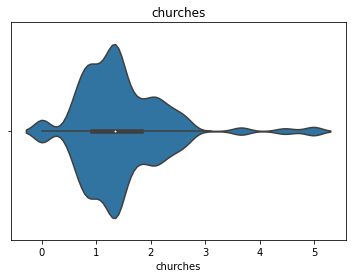

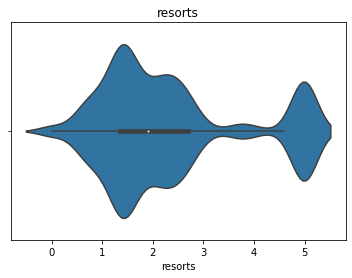

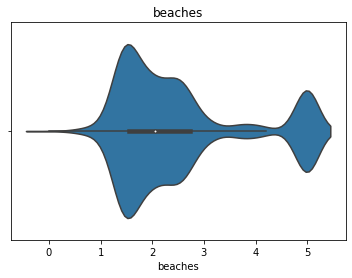

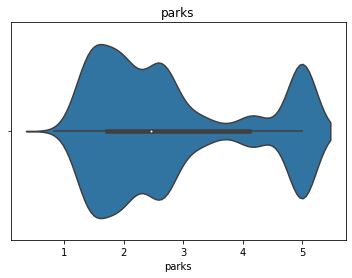

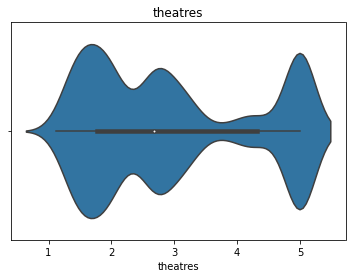

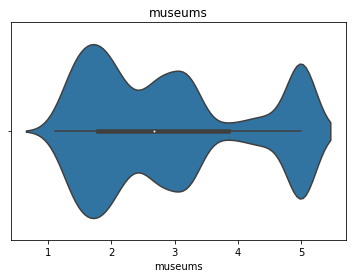

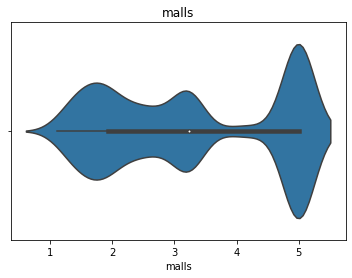

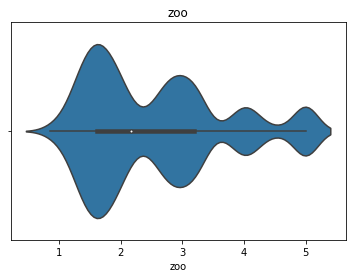

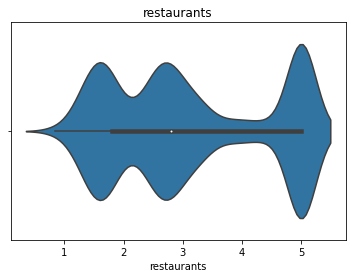

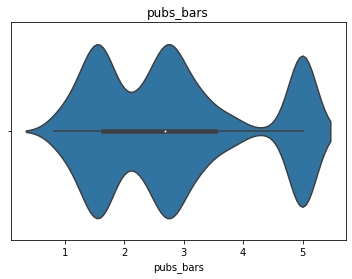

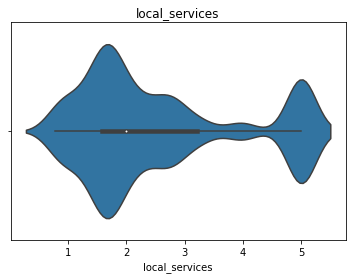

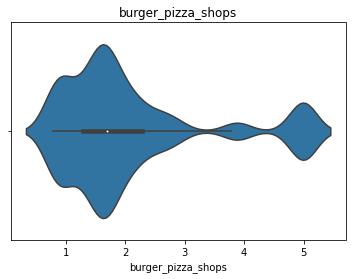

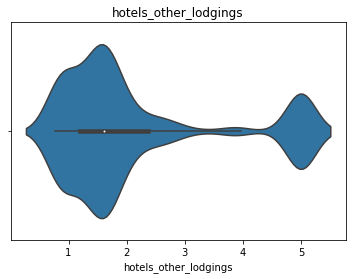

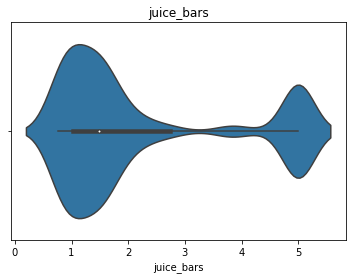

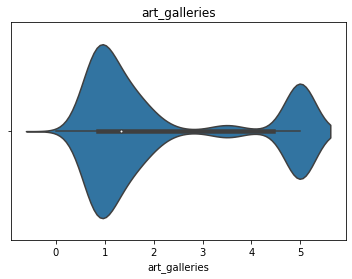

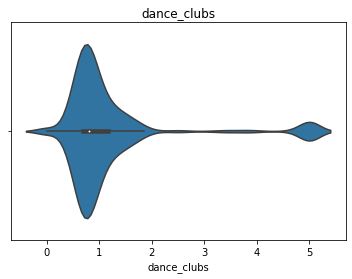

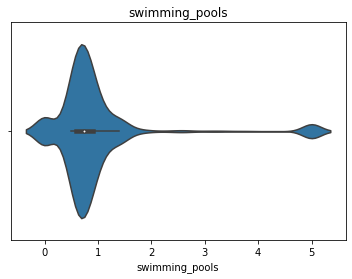

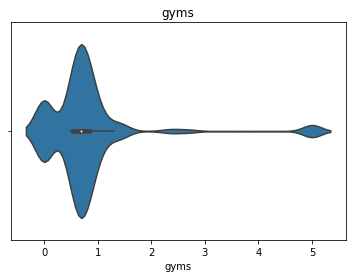

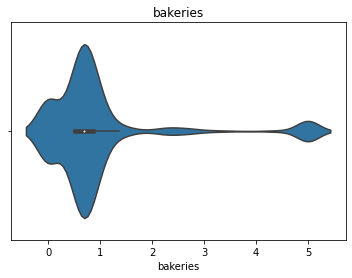

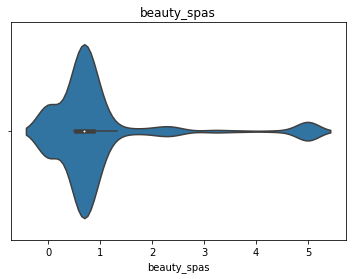

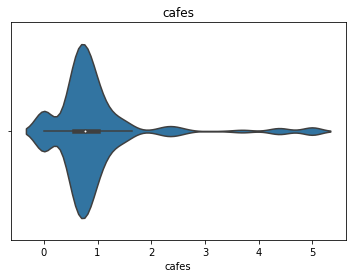

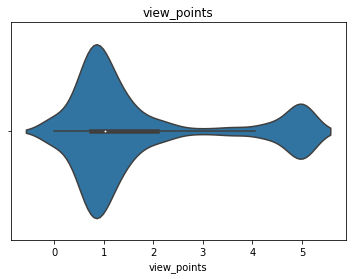

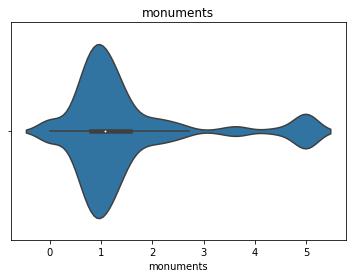

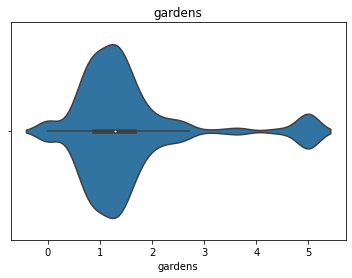

In [30]:
for i in data.columns:
    sns.violinplot(x=data[i])
    plt.title(i)
    plt.show()

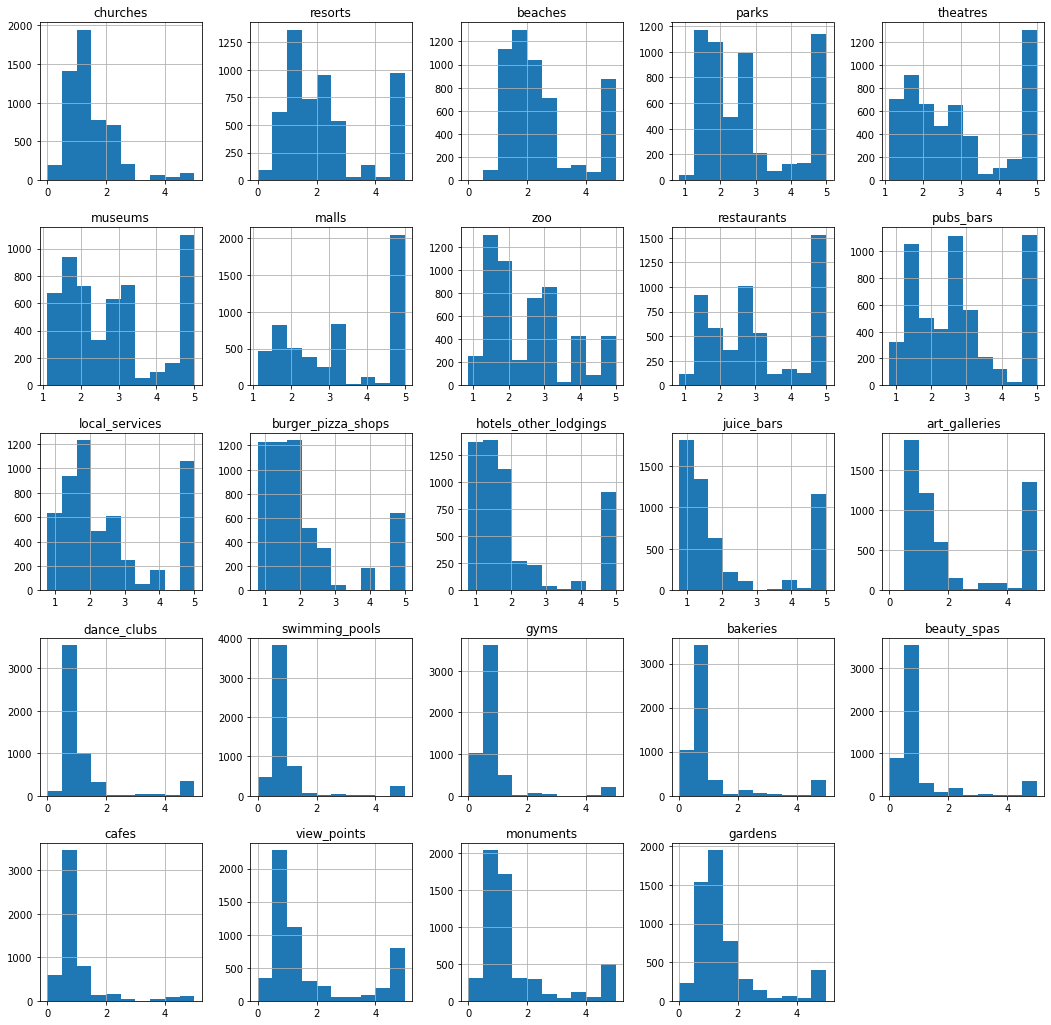

In [33]:
a=data.hist(figsize=(18,18))

In [34]:
from scipy.cluster.hierarchy import linkage,dendrogram

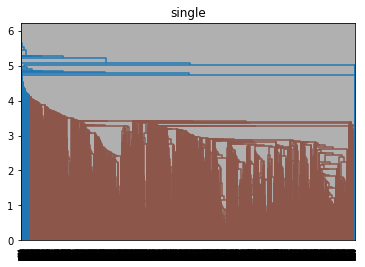

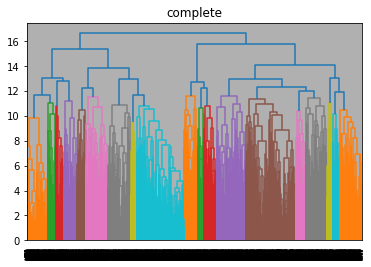

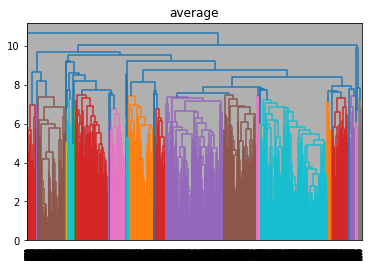

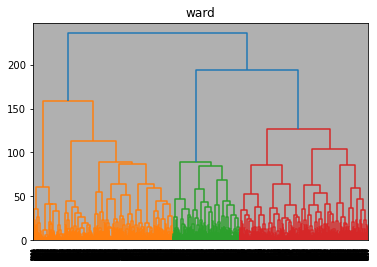

In [36]:
link_methods=['single','complete','average','ward']
for i in link_methods:
    dendrogram(linkage(data,method=i,metric='euclidean'))
    plt.title(i)
    plt.grid()
    plt.show()

In [37]:
import time

Time elapsed {2.263061046600342} sec


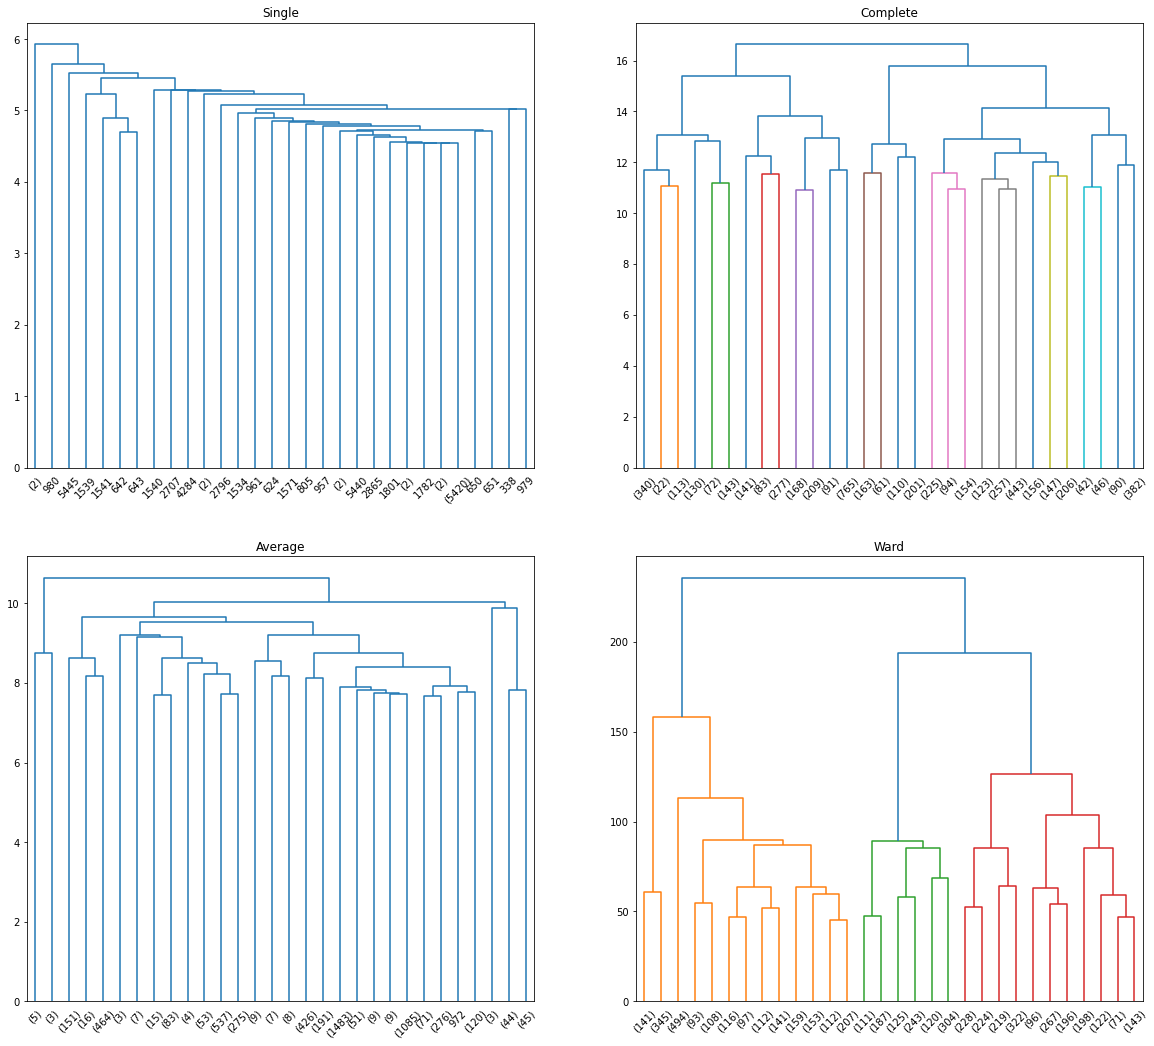

In [38]:
st = time.time()
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,18))

dendrogram(linkage(data,method='single', metric='euclidean'),truncate_mode='lastp',ax=ax1)
ax1.set_title('Single')

dendrogram(linkage(data,method='complete', metric='euclidean'),truncate_mode='lastp',ax=ax2)
ax2.set_title('Complete')

dendrogram(linkage(data,method='average', metric='euclidean'),truncate_mode='lastp',ax=ax3)
ax3.set_title('Average')

dendrogram(linkage(data,method='ward', metric='euclidean'),truncate_mode='lastp',ax=ax4)
ax4.set_title('Ward')

et = time.time()
print(f'Time elapsed',{et-st},'sec')

plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering as AC

In [40]:
m1=AC(n_clusters=4,affinity='euclidean',linkage='ward')
ypred_m1=m1.fit_predict(data)
print(ypred_m1)

[0 0 0 ... 2 2 2]


In [41]:
print(m1.labels_)

[0 0 0 ... 2 2 2]


In [42]:
from collections import Counter

In [43]:
c1=Counter(ypred_m1)
print(c1)

Counter({0: 2086, 1: 1792, 2: 1090, 3: 486})


In [44]:
k,v=c1.keys(),c1.values()
tot=sum(v)
v_per=[(i/tot)*100 for i in v]
print(v_per)

[38.24715804913825, 32.85661899523286, 8.91089108910891, 19.985331866519985]


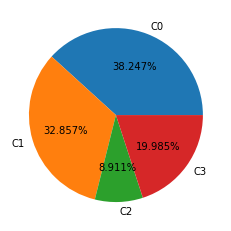

In [45]:
plt.pie(v,labels=['C0','C1','C2','C3'],autopct='%.3f%%')
plt.show()

In [46]:
df1['Cls4']=ypred_m1
df1.head()

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Cls4
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0


In [47]:
res=df1.iloc[:,1:].groupby('Cls4').mean().T
res

Cls4,0,1,2,3
churches,1.440796,1.203253,2.263661,0.638930
resorts,2.431477,2.272712,2.815248,0.905679
beaches,2.989401,2.066016,2.635046,1.573951
parks,3.777234,2.252176,2.370761,1.555679
theatres,4.156477,2.448945,2.127073,1.564671
museums,3.651016,2.931936,1.958651,1.596193
malls,3.501035,4.090670,2.042596,2.919506
zoo,2.486232,3.338158,1.599835,1.949588
restaurants,2.847133,4.264587,1.953835,2.759712
pubs_bars,2.578130,3.873326,1.551642,2.961420
